# Plot traffic accidents in New York City

In [2]:
from pandas import read_json, to_datetime, Grouper
from geopandas import GeoDataFrame, points_from_xy, datasets
from matplotlib import pyplot, colors
from contextily import add_basemap, providers

## Load data

In [3]:
# Traffic accidents in NYC
url = 'https://data.cityofnewyork.us/resource/h9gi-nx95.json'
accidents = read_json(url)

accidents.head(5)

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,longitude,location,cross_street_name,off_street_name,contributing_factor_vehicle_3,contributing_factor_vehicle_4,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-04-14T00:00:00.000,2022-06-21 05:32:00,BRONX WHITESTONE BRIDGE,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-13T00:00:00.000,2022-06-21 21:35:00,NaN,1,0,1,0,0,0,0,...,-73.97617,"{'latitude': '40.68358', 'longitude': '-73.976...",620 ATLANTIC AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-15T00:00:00.000,2022-06-21 16:15:00,HUTCHINSON RIVER PARKWAY,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-13T00:00:00.000,2022-06-21 16:00:00,VANDERVORT AVENUE,0,0,0,0,0,0,0,...,NaN,NaN,NaN,ANTHONY STREET,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-12T00:00:00.000,2022-06-21 08:25:00,EDSON AVENUE,0,0,0,0,0,0,0,...,0.00000,"{'latitude': '0.0', 'longitude': '0.0'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean data

In [4]:
# Remove rows where coordinates are NaN or 0
accidents.dropna(subset=['latitude', 'longitude'], inplace=True)
accidents.drop(accidents[accidents.latitude == 0].index, inplace=True)

# Remove noisy columns
keep_columns = [
    'borough',
    'crash_time',
    'latitude',
    'longitude',
    'number_of_persons_killed',
    'number_of_persons_injured',
    'number_of_cyclist_injured',
    'number_of_pedestrians_injured',
    'number_of_cyclist_injured',
    'on_street_name'
]
accidents.drop(accidents.columns.difference(keep_columns), axis=1, inplace=True)

# Reindex
accidents.reset_index(inplace=True)

accidents.head(5)

,index,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_cyclist_injured,borough,latitude,longitude
0,1,2022-06-21 21:35:00,NaN,1,0,1,0,BROOKLYN,40.683580,-73.976170
1,13,2022-06-21 22:50:00,GOLD STREET,0,0,0,0,BROOKLYN,40.697540,-73.983120
2,15,2022-06-21 14:50:00,NaN,0,0,0,0,BRONX,40.843464,-73.836000
3,16,2022-06-21 11:00:00,COURT STREET,1,0,0,0,NaN,40.692547,-73.990974
4,17,2022-06-21 22:20:00,RALPH AVENUE,1,0,0,0,BROOKLYN,40.626457,-73.918000


## Plot data

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_cyclist_injured
borough,,,,
BRONX,43,0,4,3
BROOKLYN,105,1,18,10
MANHATTAN,36,0,11,3
QUEENS,66,0,10,5
STATEN ISLAND,14,0,1,0


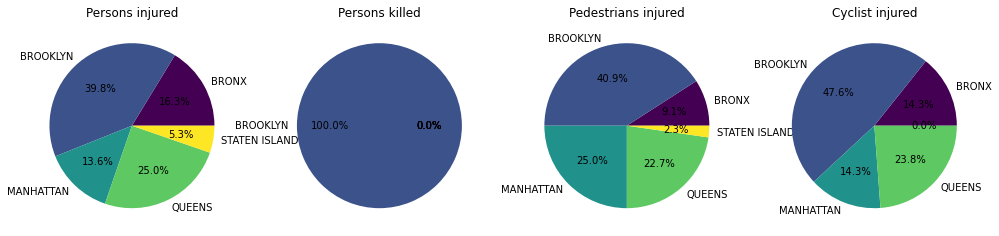

In [6]:
# Aggregate data by 'borough' field and sum values. Keep just count values
accidents_by_borough = accidents.groupby('borough').agg('sum')
accidents_by_borough.drop(['index', 'latitude', 'longitude'], axis=1, inplace=True)

display(accidents_by_borough)

# accidents_by_borough.plot.pie(y='number_of_persons_injured', figsize=(5, 5))
plot = accidents_by_borough.plot.pie(
    subplots=True,
    figsize=(17, 10),
    legend=False,
    autopct='%1.1f%%',
    cmap='viridis',
    title=['Persons injured', 'Persons killed', 'Pedestrians injured', 'Cyclist injured'],
    ylabel=''
)

,index,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_cyclist_injured,latitude,longitude
crash_time,,,,,,,
0,24047,17,0,0,3,1954.129494,-3548.163215
1,6746,3,0,1,1,529.570353,-960.978086
2,7505,3,0,0,0,529.053343,-961.056484
3,6972,5,0,0,0,448.121652,-812.942041
4,10279,3,0,0,0,610.960559,-1108.990958
5,6342,5,0,0,0,407.479438,-739.432157
6,9212,3,0,0,0,976.975107,-1773.670549


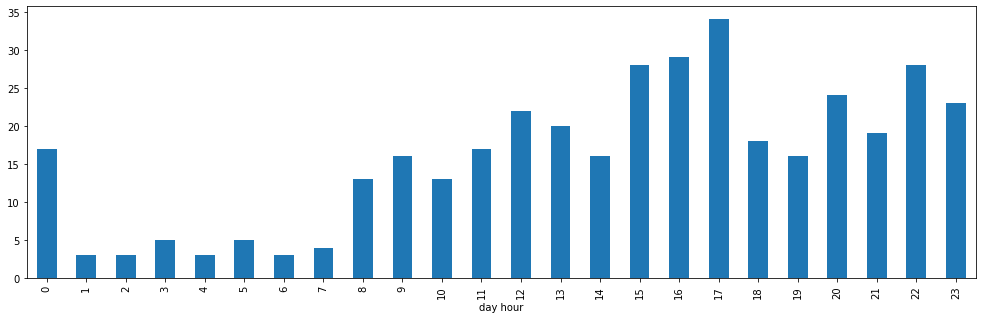

In [5]:
# Aggregate data by hour and sum values
accidents_by_hour = accidents.groupby(by=accidents.crash_time.dt.hour).agg('sum')

display(accidents_by_hour.head(7))

plot = accidents_by_hour.plot.bar(
    y='number_of_persons_injured',
    figsize=(17, 5),
    xlabel='day hour',
    legend=False
)

## Plot map

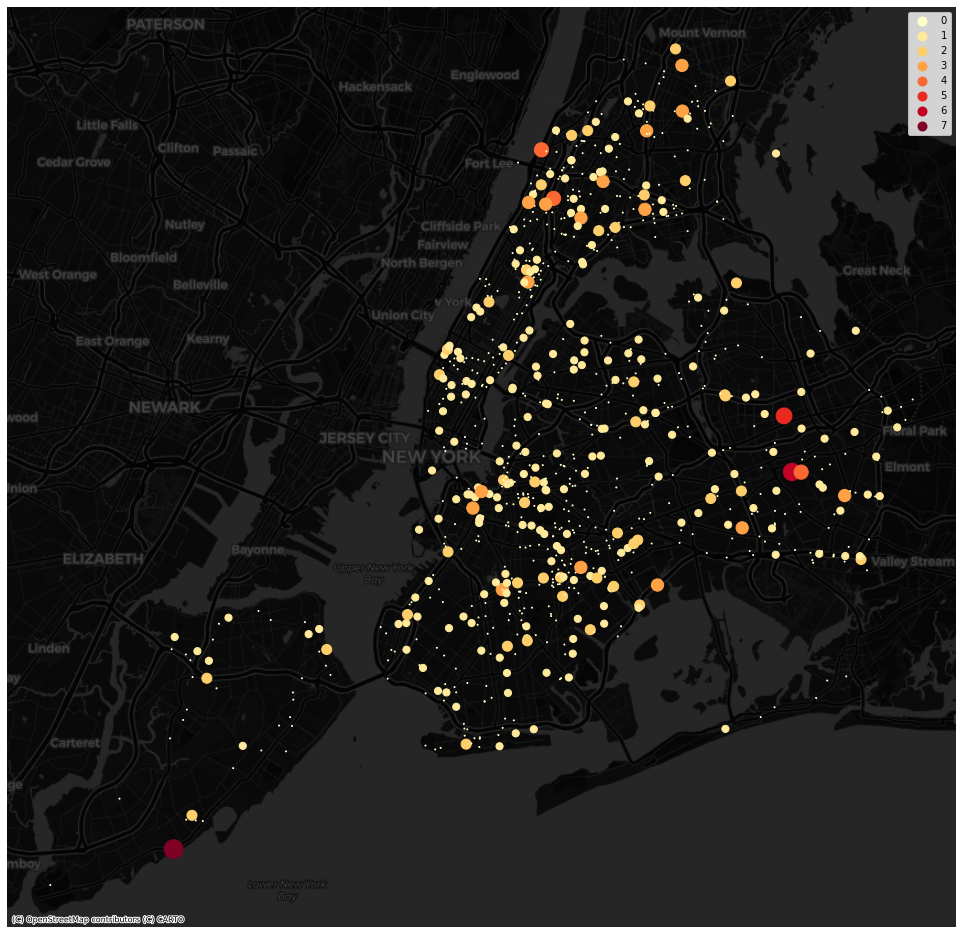

In [205]:
# Create geo data structure to work with geographical data
accidents_geo = GeoDataFrame(accidents, geometry=points_from_xy(accidents.longitude, accidents.latitude), crs='EPSG:4326')
accidents_geo.to_crs('EPSG:3857', inplace=True)

plot = accidents_geo.plot(
    figsize=(17,17),
    markersize=1 + 50 * accidents_geo.number_of_persons_injured,
    column='number_of_persons_injured',
    cmap='YlOrRd',
    categorical=True,
    legend=True
)

contextily.add_basemap(plot, crs='EPSG:3857', source=providers.CartoDB.DarkMatter)
plot.set_axis_off()